In [10]:
import ctypes
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import utils

import sys

# # Check if the argument count is correct
# if len(sys.argv) != 5:
#     print("Usage: python myfile.py [int Threads] [int maxAcq] [int MaxIter] [int Sleepcycles] [string Lock]")
#     sys.exit(1)

# # Access the argument
# maxThreads = int(sys.argv[1])
# maxAcq = int(sys.argv[2])
# maxIter = int(sys.argv[3])
# sleepCyles = int(sys.argv[4])
# Lock = str(sys.argv[5])

maxThreads = 12
maxAcq = 100
maxIter = 100
sleepCyles = 1
Lock = "TATAS"


# set shared library
binary = ctypes.CDLL( "build/sharedLibrary.so" )

lockNameList = ["benchLockOMP", "benchCriticalOMP", "benchTAS", "benchTATAS", 
                "benchTicket", "benchArray", "benchCLH", "benchMCS", "benchHemlock"]

for lock in lockNameList:
    if Lock in lock:
        lockName = lock
        break  # Exit the loop once a match is found

print("The matching lock name is:", lockName)

# Load the shared library


# Access the function from the library
function_name = 'benchTATAS'
LockC = getattr(binary, lockName)

LockC.restype = utils.benchData

print("Starting Benchmark of " + lockName + "Lock")


threadNum = [i for i in range(2, maxThreads+1)]
bmListLock = {threads: [LockC(threads, maxAcq, sleepCyles) for _ in range(maxIter)] for threads in threadNum}
df = utils.dataframeBuilder(bmListLock).fillna(0)
print(df)







The matching lock name is: benchTATAS
Starting Benchmark of benchTATASLock
    threads  meanTime  stddTime  meanFail      stddFail      meanWait  \
0         2  0.002219  0.003849    521.88    480.592099  1.114700e-07   
1         3  0.000225  0.001102   1256.69    229.728696  3.290100e-07   
2         4  0.000053  0.000196   1367.38     99.559006  6.404500e-07   
3         5  0.000147  0.000598   1624.68    615.193772  7.491300e-07   
4         6  0.000191  0.000662   1838.59    226.120326  1.084450e-06   
5         7  0.000258  0.000915   3858.93  13947.032067  1.525860e-06   
6         8  0.000042  0.000121   9920.33  71140.886228  2.288500e-06   
7         9  0.000178  0.000723   2878.63    598.140061  1.799600e-06   
8        10  0.000045  0.000140   2865.33    265.018794  1.891550e-06   
9        11  0.000032  0.000030   3313.51   2204.204290  2.327610e-06   
10       12  0.000066  0.000251   3764.06   2127.784241  2.688690e-06   

        stddWait  meanFair   stddFair        mea

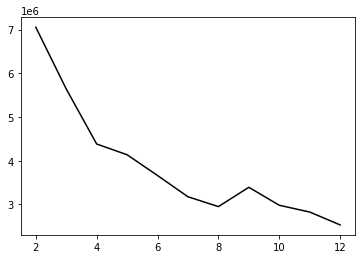

In [15]:
df = pd.read_csv('benchHemlock_THR12_ACQ1000_ITER1000_Nebula.txt', sep='\t') 

utils.plotStuff("threads", "TP", "OMP Lock", df, "black")